# Getting Started with pandas

In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Introduction to pandas Data Structures

### Series

In [4]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [5]:
obj.values

array([ 4,  7, -5,  3])

In [6]:
obj.index  # like range(4)

RangeIndex(start=0, stop=4, step=1)

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [8]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [9]:
obj2['a']

-5

In [10]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [11]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [12]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [13]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [14]:
'b' in obj2

True

In [15]:
'e' in obj2

False

<mark>dictionary可以直接创建Series</mark>

In [16]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [17]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [18]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [19]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [20]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

<mark>auto alignments by index</mark>

In [21]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [22]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [23]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [24]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [25]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

<mark>A Series’s index can be altered in-place</mark>

In [26]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

In [27]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [28]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [29]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [30]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [31]:
frame.columns

Index(['state', 'year', 'pop'], dtype='object')

In [32]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


<mark>.[]获得的列为Series</mark>

In [33]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [34]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [35]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [36]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [37]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [38]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


<mark>Series label be realigned</mark>

In [39]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2 #空位填上缺失值

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


<mark>Assigning a column that doesn’t exist will create a new column</mark>

In [40]:
frame2.state == 'Ohio'

one       True
two       True
three     True
four     False
five     False
six      False
Name: state, dtype: bool

In [41]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [42]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [43]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [44]:
frame3 = pd.DataFrame(pop, index=[2000, 2001, 2002])
frame3 #外层字典的键作为列，内层键则作为行索引：

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [45]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [46]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [47]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [48]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pdata

{'Ohio': 2000    1.5
 2001    1.7
 Name: Ohio, dtype: float64,
 'Nevada': 2000    NaN
 2001    2.4
 Name: Nevada, dtype: float64}

In [49]:
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


In [50]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [51]:
frame3.index.names?

Type:        property
String form: <property object at 0x7f8b2065ff50>
Docstring:   <no docstring>


In [52]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [53]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

In [54]:
type(frame2.values)

numpy.ndarray

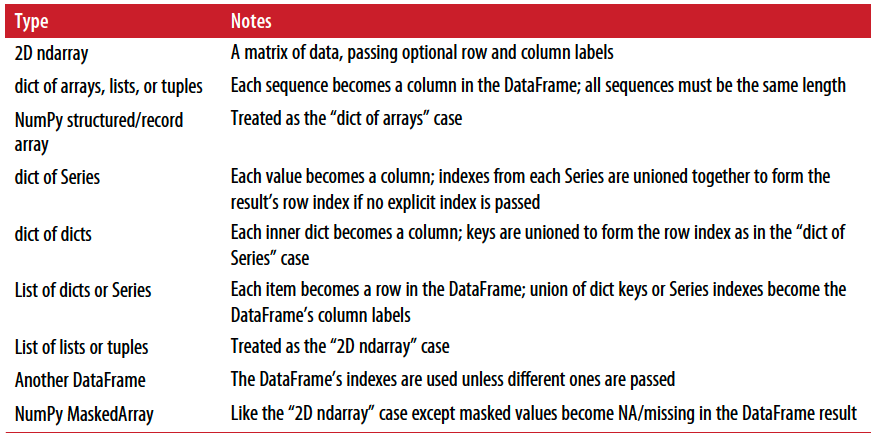

### Index Objects

In [55]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [56]:
index[1:]

Index(['b', 'c'], dtype='object')

In [57]:
#index[1] = 'd'  # TypeError

In [58]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [59]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [60]:
obj2.index is labels

True

In [61]:
frame3
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [62]:
'Ohio' in frame3.columns

True

In [63]:
frame3.index

Int64Index([2000, 2001, 2002], dtype='int64', name='year')

In [64]:
2003 in frame3.index

False

In [65]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels #可以有重复标签

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

In [66]:
ind = pd.Index(['a', 'b'])

In [67]:
ind.name = 'test'

In [68]:
ind

Index(['a', 'b'], dtype='object', name='test')

![index方法和属性](http://upload-images.jianshu.io/upload_images/7178691-5499d14f0e2cd639.jpg?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## Essential Functionality

### Reindexing

In [69]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [70]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [71]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

<mark>对于时间序列这样的有序数据，重新索引时可能需要做一些插值处理。method选项即可达到此目的，例如，使用ffill可以实现前向值填充：</mark>

In [72]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [73]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [74]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


<mark> 借助DataFrame，reindex可以修改（行）索引和列。只传递一个序列时，会重新索引结果的行，列可以用columns关键字重新索引：</mark>

In [75]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


![reindex函数的各参数](http://upload-images.jianshu.io/upload_images/7178691-efa3dbd4b83c61ec.jpg?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

### Dropping Entries from an Axis

In [76]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [77]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [78]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [79]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [80]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [81]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [82]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [83]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [84]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [85]:
obj.drop?

Signature:
obj.drop(
    labels=None,
    axis=0,
    index=None,
    columns=None,
    level=None,
    inplace=False,
    errors='raise',
) -> 'Series'
Docstring:
Return Series with specified index labels removed.

Remove elements of a Series based on specifying the index labels.
When using a multi-index, labels on different levels can be removed
by specifying the level.

Parameters
----------
labels : single label or list-like
    Index labels to drop.
axis : 0, default 0
    Redundant for application on Series.
index : single label or list-like
    Redundant for application on Series, but 'index' can be used instead
    of 'labels'.
columns : single label or list-like
    No change is made to the Series; use 'index' or 'labels' instead.
level : int or level name, optional
    For MultiIndex, level for which the labels will be removed.
inplace : bool, default False
    If True, do operation inplace and return None.
errors : {'ignore', 'raise'}, default 'raise'
    If 'ignore', suppre

### Indexing, Selection, and Filtering

In [86]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [87]:
obj['b']

1.0

In [88]:
obj[1]

1.0

In [89]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [90]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [91]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [92]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

<mark>用标签切片包含末端</mark>

In [93]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [94]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [95]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [96]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [97]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [98]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [99]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [100]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [101]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [102]:
data[:3]["three"]

Ohio         0
Colorado     6
Utah        10
Name: three, dtype: int64

In [103]:
data['three'][:3]

Ohio         0
Colorado     6
Utah        10
Name: three, dtype: int64

#### Selection with loc and iloc

In [104]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [105]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [106]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [107]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [108]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [109]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


![DataFrame索引](http://upload-images.jianshu.io/upload_images/7178691-64354f2ab777bd8c.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240 "DataFrame索引")

In [110]:
type(data.three)

pandas.core.series.Series

### Integer Indexes

<mark>the point is index can be label or integer
</mark>

In [111]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [112]:
#ser[-1] #此处有歧义

In [113]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [114]:
ser[:1] #此处还是整数索引，如果是标签索引则包含末端

0    0.0
dtype: float64

In [115]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [116]:
ser.iloc[:1]

0    0.0
dtype: float64

### Arithmetic and Data Alignment

In [117]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [118]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [119]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [120]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [121]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [122]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [123]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1

,A
0,1
1,2


In [124]:
df2

,B
0,3
1,4


In [125]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### Arithmetic methods with fill values

In [126]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [127]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [128]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [129]:
df1.add(df2, fill_value=0) #填充0

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [130]:
pd.DataFrame.add(df1, df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [131]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [132]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [133]:
df1.rdiv(1).replace(np.inf, 0)

,a,b,c,d
0,0.000,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


|Method |Description|
|---------|-------|
|add, radd |Methods for addition (+)|
|sub, rsub |Methods for subtraction (-)|
|div, rdiv |Methods for division (/)|
|floordiv, rfloordiv |Methods for floor division (//)|
|mul, rmul |Methods for multiplication (*)|
|pow, rpow |Methods for exponentiation (**)|

In [134]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


#### Operations between DataFrame and Series

<mark>np.array broadcasting</mark>

In [135]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [136]:
arr[0]

array([0., 1., 2., 3.])

In [137]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [138]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [139]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [140]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [141]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [142]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [143]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [144]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

<mark>匹配行且在列上广播，则必须使用算术运算方法</mark>

In [145]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping

In [146]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [147]:
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


<mark>apply works on axis</mark>

In [148]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.802165
d    1.684034
e    2.689627
dtype: float64

In [149]:
frame.apply(f, axis='columns')

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

In [150]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


<mark>applymap works on elementwise, Series:map</mark>

In [151]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.20,0.48,-0.52
Ohio,-0.56,1.97,1.39
Texas,0.09,0.28,0.77
Oregon,1.25,1.01,-1.30


In [152]:
frame['e'].map(format)

Utah      -0.52
Ohio       1.39
Texas      0.77
Oregon    -1.30
Name: e, dtype: object

### Sorting and Ranking

<mark>sort_index & sort_values</mark>

In [153]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [154]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index() #axis=0 按行index

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [155]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [156]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [157]:
obj = pd.Series([4, 7, -3, 2])

In [158]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [159]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values() #任何缺失值会被放在末尾

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [160]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [161]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [162]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [163]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()
# rank是通过“为各组分配一个平均排名”的方式破坏平级关系的

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [164]:
obj.rank(method='first')
# method='first'按出现的先后顺序

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [165]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [166]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [167]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Axis Indexes with Duplicate Labels

In [168]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [169]:
obj.index.is_unique

False

In [170]:
obj['a']

a    0
a    1
dtype: int64

In [171]:
obj['c']

4

In [172]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.274992,0.228913,1.352917
a,0.886429,-2.001637,-0.371843
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


In [173]:
df.loc['b']

,0,1,2
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


## Summarizing and Computing Descriptive Statistics

In [174]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [175]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [176]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [177]:
df.mean(axis='columns', skipna=False)
# 除非全部NA，否则自动忽略NA；skipna选项可以禁用该功能

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

![约简方法的常用选项](http://upload-images.jianshu.io/upload_images/7178691-af35e3809278410e.jpg?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

> 有些方法（如idxmin和idxmax）返回的是间接统计（比如达到最小值或最大值的索引）：

In [178]:
df.idxmax(axis=0)

one    b
two    d
dtype: object

In [179]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 256.0+ bytes


In [181]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [182]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

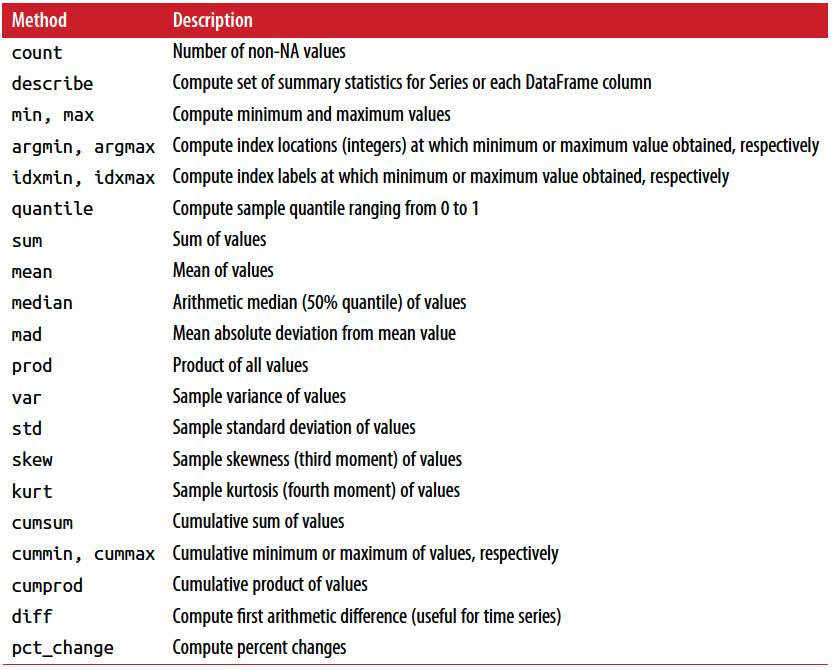

### Correlation and Covariance

In [183]:
#conda install pandas-datareader

price = pd.read_pickle('examples/yahoo_price.pkl')
volume = pd.read_pickle('examples/yahoo_volume.pkl')

In [185]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [186]:
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [187]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-03-01,0.053851,0.015219,0.019623,0.021921
2021-03-02,-0.020894,-0.003396,-0.012957,-0.002724
2021-03-03,-0.024457,0.016870,-0.026981,-0.023668
2021-03-04,-0.015812,-0.018388,-0.003647,0.011043
2021-03-05,0.000250,0.024394,0.020862,0.018018


In [193]:
returns['MSFT'].corr(returns['IBM'])

0.5382746536888486

In [194]:
returns['MSFT'].cov(returns['IBM'])

0.0001526096456778403

In [195]:
returns.MSFT.corr(returns.IBM)

0.5382746536888486

In [196]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.453153,0.709365,0.649135
IBM,0.453153,1.000000,0.538275,0.507897
MSFT,0.709365,0.538275,1.000000,0.777775
GOOG,0.649135,0.507897,0.777775,1.000000


In [197]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000360,0.000141,0.000233,0.000206
IBM,0.000141,0.000268,0.000153,0.000139
MSFT,0.000233,0.000153,0.000300,0.000225
GOOG,0.000206,0.000139,0.000225,0.000278


> Passing a Series returns a Series with the correlation value computed for each column:

In [200]:
returns.corrwith(returns.IBM)

AAPL    0.453153
IBM     1.000000
MSFT    0.538275
GOOG    0.507897
dtype: float64

In [201]:
volume

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-03-07,143315600.0,5171000.0,38407800.0,2985100
2016-03-08,126247600.0,5579100.0,33835100.0,2076300
2016-03-09,108806800.0,4406500.0,28251600.0,1421500
2016-03-10,134054400.0,4020600.0,38387800.0,2833500
2016-03-11,109632800.0,4421900.0,32275700.0,1970800
...,...,...,...,...
2021-03-01,115998300.0,5714500.0,25324000.0,1404500
2021-03-02,102015300.0,4522200.0,22785500.0,1133600
2021-03-03,112430400.0,7396200.0,33950400.0,1483100


> Passing a DataFrame computes the correlations of matching column names:

In [202]:
returns.corrwith(volume)

AAPL   -0.072809
IBM    -0.117020
MSFT   -0.088033
GOOG   -0.134544
dtype: float64

### Unique Values, Value Counts, and Membership

In [204]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [205]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [206]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [207]:
pd.value_counts(obj.values, sort=False)

d    1
c    3
a    3
b    2
dtype: int64

<mark>isin判定得到子集</mark>

In [209]:
obj
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [210]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [212]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match) #get后面to_match的index

array([0, 2, 1, 1, 0, 2])

In [216]:
pd.Index.get_indexer?

Signature: pd.Index.get_indexer(self, target, method=None, limit=None, tolerance=None) -> numpy.ndarray
Docstring:
Compute indexer and mask for new index given the current index. The
indexer should be then used as an input to ndarray.take to align the
current data to the new index.

Parameters
----------
target : Index
method : {None, 'pad'/'ffill', 'backfill'/'bfill', 'nearest'}, optional
    * default: exact matches only.
    * pad / ffill: find the PREVIOUS index value if no exact match.
    * backfill / bfill: use NEXT index value if no exact match
    * nearest: use the NEAREST index value if no exact match. Tied
      distances are broken by preferring the larger index value.
limit : int, optional
    Maximum number of consecutive labels in ``target`` to match for
    inexact matches.
tolerance : optional
    Maximum distance between original and new labels for inexact
    matches. The values of the index at the matching locations most
    satisfy the equation ``abs(index[indexer

![figure](http://upload-images.jianshu.io/upload_images/7178691-b53c4a9d65a2db32.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

In [217]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [218]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## Conclusion

In [191]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS